In [1]:
import skimage           #import image processing package
import skimage.feature
import skimage.viewer
import sys
import matplotlib.pyplot as plt


/home/tunde/miniconda3/envs/python3_env/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


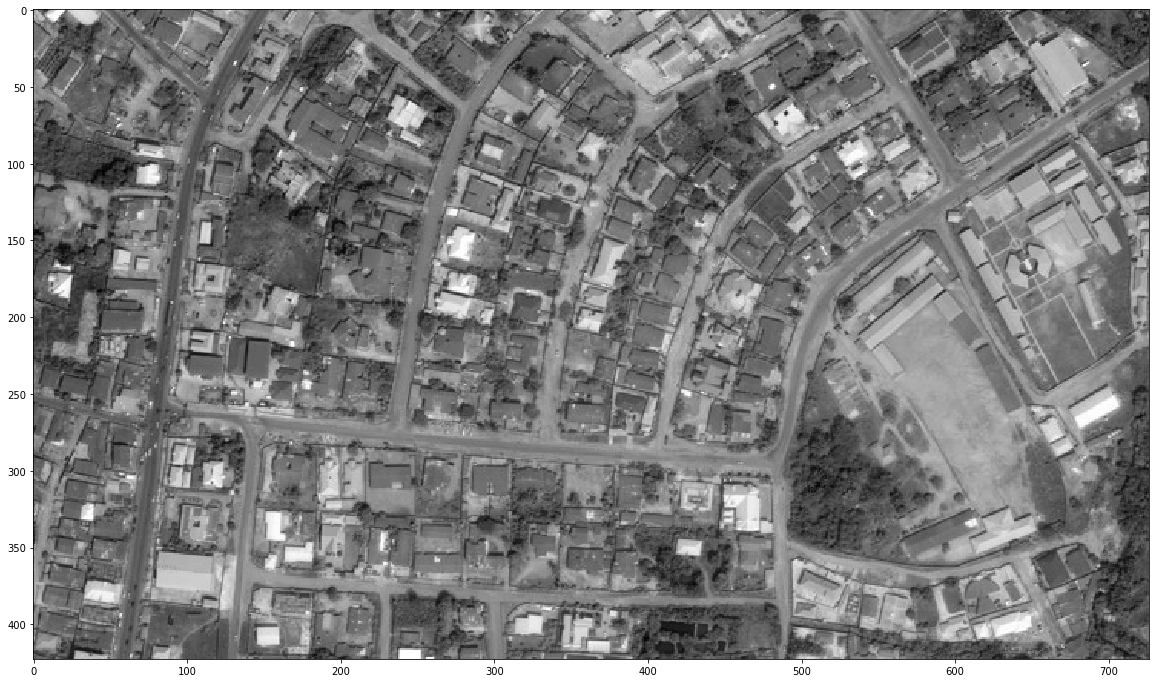

In [4]:
# load original image 
image_orig = skimage.io.imread(fname = "akure.jpg")

# load and display image as grayscale
image = skimage.io.imread(fname = "akure.jpg", as_gray=True)

plt.figure(figsize=(20,14))
plt.imshow(image,cmap=plt.cm.gray)

(423, 727)


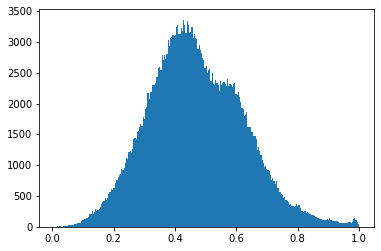

In [5]:
#plot histogram of image to show distribution of 256bits colors [0 - black, 1- white]
plt.hist(image.ravel(), bins=256);
print(image.shape)

distribution spans entire color range continuously, it is hard to find a threshold to convert the image to binary

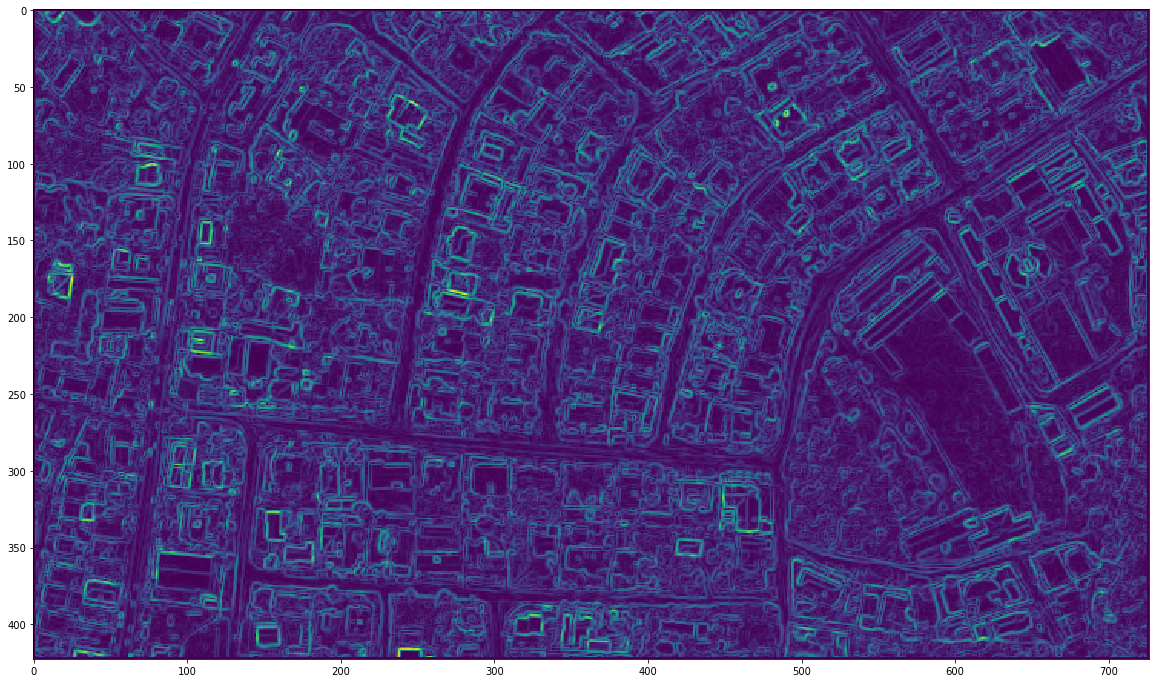

In [7]:
#use prewitt edge filter to highlight edges in the image. this should in principle highlight buidling edges

edge_prew=skimage.filters.edges.prewitt(image)
plt.figure(figsize=(20,14))
plt.imshow(edge_prew)


In [8]:
#mask = edge_prew > skimage.filters.threshold_otsu(edge_prew)

#plt.figure(figsize=(20,14))
#clean_border = skimage.segmentation.clear_border(mask)

#plt.imshow(clean_border, cmap='gray') 

In [9]:
#find contours with similar intensity in image
contours=skimage.measure.find_contours(edge_prew,0.12,fully_connected="high" )


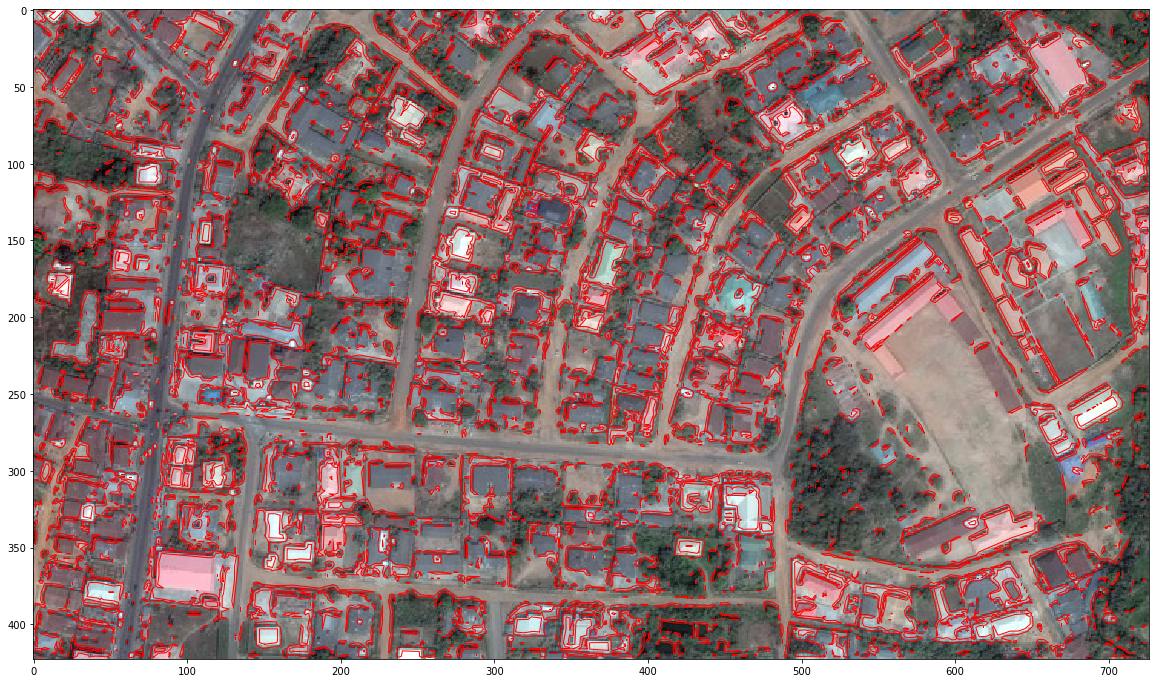

In [10]:
%matplotlib inline
plt.figure(figsize=(20,14))
plt.imshow(image_orig)      #show the original image


for n, contour in enumerate(contours):
    #plt.plot(contour[:, 1], contour[:, 0], "r",linewidth=1)   #plot the contours on image
    coords = skimage.measure.approximate_polygon(contour, tolerance=0.5)#use a polygon to approximate the determined contours
    plt.plot(coords[:, 1], coords[:, 0], '-r', linewidth=1)   #plot the polygon on the original image


the polygons match some bulding but not very accurate and also catches some trees and other features.

### attempting another method with cv2 library

In [11]:
import numpy as np 
import cv2 
import matplotlib.pylab as plt

(423, 727, 3)

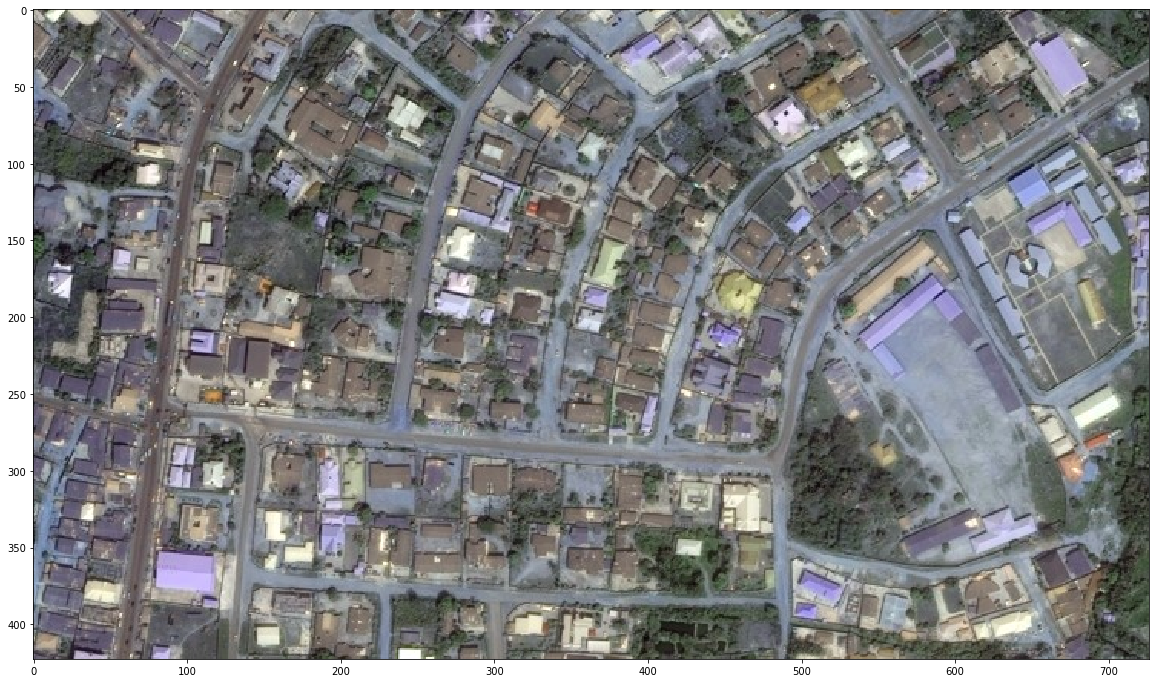

In [12]:
img2 = cv2.imread('akure.jpg', cv2.IMREAD_COLOR)    #kiad the image
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,14))
plt.imshow(img2);
img2.shape

(423, 727)

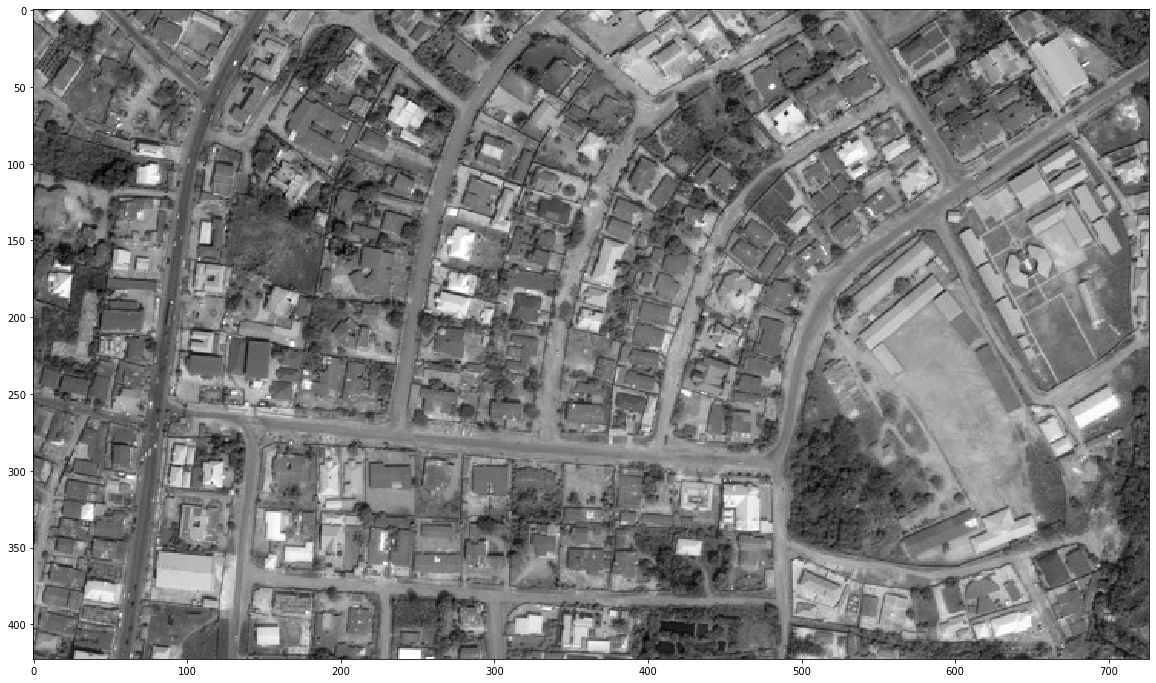

In [13]:
#img_grey=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
img_grey = cv2.imread('akure.jpg', cv2.IMREAD_GRAYSCALE)    #load the image in grayscale
plt.figure(figsize=(20,14))
plt.imshow(img_grey,cmap=plt.cm.gray);
img_grey.shape


(423, 727)

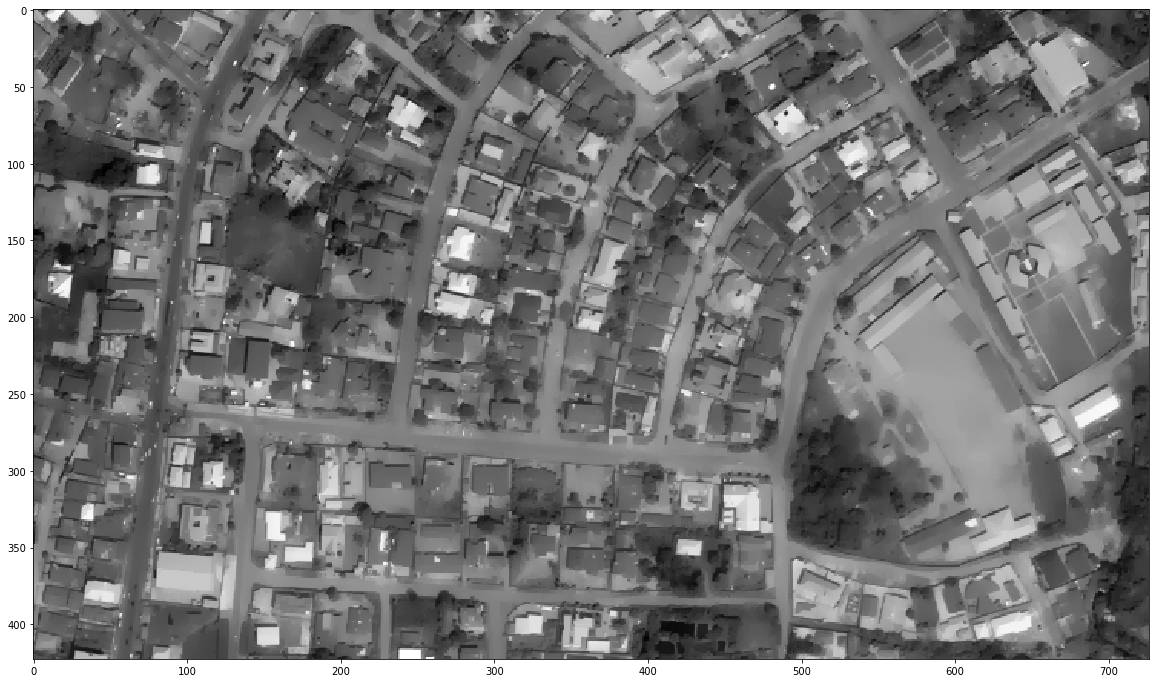

In [14]:
#use edge preserving filter to enhance edges of features
edges_P=cv2.edgePreservingFilter(img_grey,sigma_s=100, sigma_r=0.1) #the values used here are just by trail and error

plt.figure(figsize=(20,14))
plt.imshow(edges_P,cmap="gray")
edges_P.shape

We see that the filter smoothens out/blurs the image but keeps the edges sharp

(423, 727)

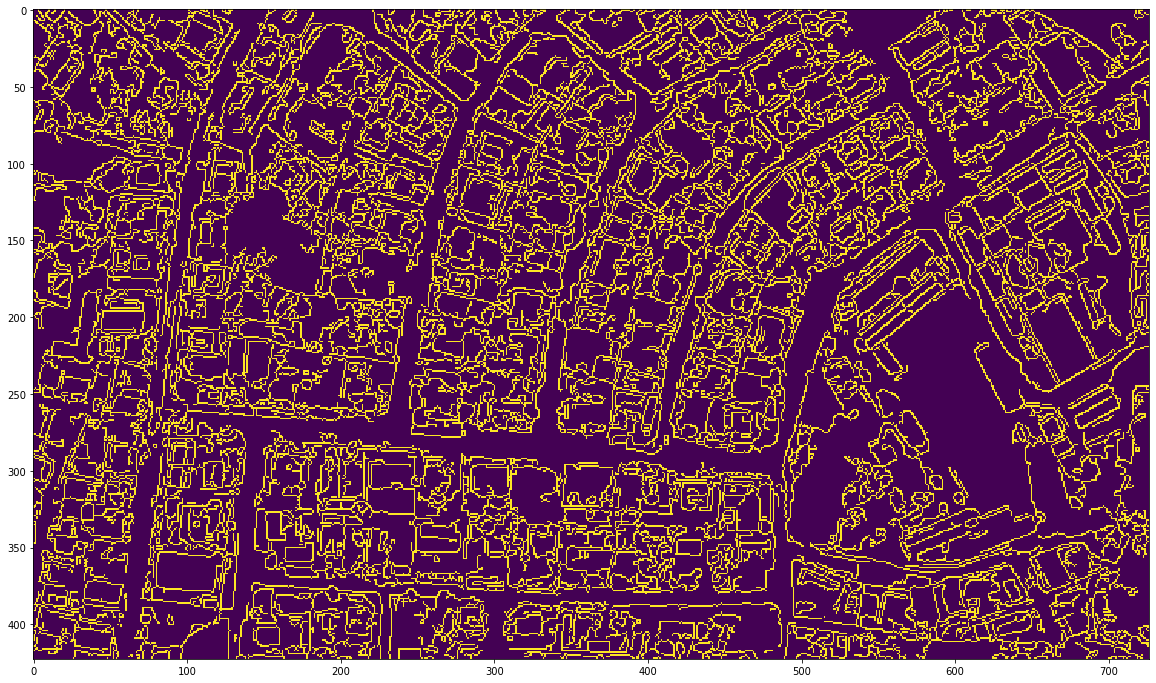

In [15]:
#use canny edge detector to detect the edges in the edge-preserved image
edges=cv2.Canny(edges_P,10, 200)
plt.figure(figsize=(20,14))
plt.imshow(edges)
edges.shape

In [16]:
#convert image to binary by separating dark background from light edges using threshold
_,threshold = cv2.threshold(edges, 10, 255,cv2.THRESH_BINARY) 

In [17]:
threshold

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [18]:
#find contours in the image
contours,_=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
contours

[array([[[ 48, 422]]], dtype=int32), array([[[707, 421]],
 
        [[708, 421]],
 
        [[709, 421]],
 
        [[710, 422]],
 
        [[711, 421]],
 
        [[712, 422]],
 
        [[713, 421]],
 
        [[714, 421]],
 
        [[713, 421]],
 
        [[712, 422]],
 
        [[711, 421]],
 
        [[710, 421]],
 
        [[709, 421]],
 
        [[708, 421]]], dtype=int32), array([[[702, 421]],
 
        [[701, 422]],
 
        [[700, 422]],
 
        [[701, 422]],
 
        [[702, 422]],
 
        [[703, 421]],
 
        [[704, 421]],
 
        [[705, 422]],
 
        [[705, 421]],
 
        [[704, 421]],
 
        [[703, 421]]], dtype=int32), array([[[407, 421]],
 
        [[406, 422]],
 
        [[405, 422]],
 
        [[404, 422]],
 
        [[405, 422]],
 
        [[406, 422]],
 
        [[407, 421]],
 
        [[408, 422]]], dtype=int32), array([[[257, 421]],
 
        [[256, 422]],
 
        [[255, 422]],
 
        [[256, 422]],
 
        [[257, 421]],
 
        [[258, 4

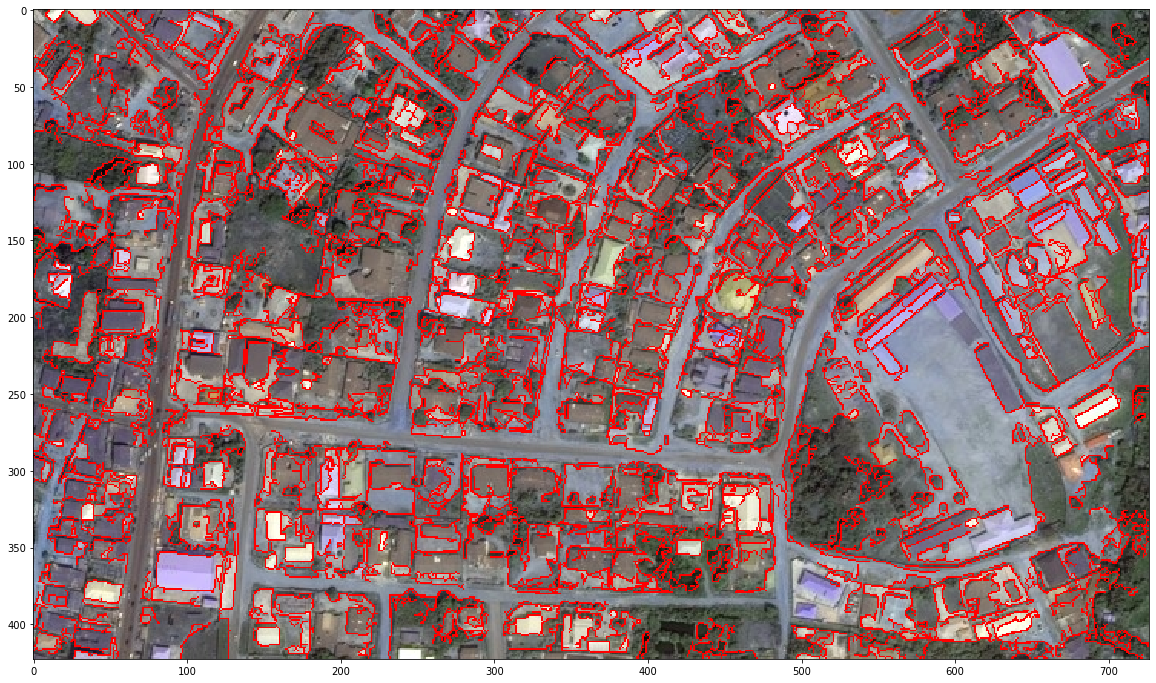

In [20]:
# Searching through every region/contour selected to  
# find the required polygon. 
for cnt in contours : 
    area = cv2.contourArea(cnt) 
   
    # Shortlisting the regions based on there area, we typically want larger areas so small blobs atre ignored. 
    if area > 10: 
        approx = cv2.approxPolyDP(cnt, 0.001 * cv2.arcLength(cnt, True), True) #approx contours by polygon
   
        # Checking if the no. of sides of the selected region is greater than 3. 
        if(len(approx) > 3):  
            cv2.drawContours(img2, [approx], -3, (255, 0, 0), 1) #draw polygons on the image

plt.figure(figsize=(20,14))
plt.imshow(img2)

# Showing the image along with outlined arrow. 
#cv2.imshow('image2', img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows() 